In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
type(data)
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# Check the description of the dataset
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(data.data.shape)

(20640, 8)


In [7]:
print(data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
# Prepare the DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
# Checking for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [13]:
### EDA Visualization

## correlation 
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


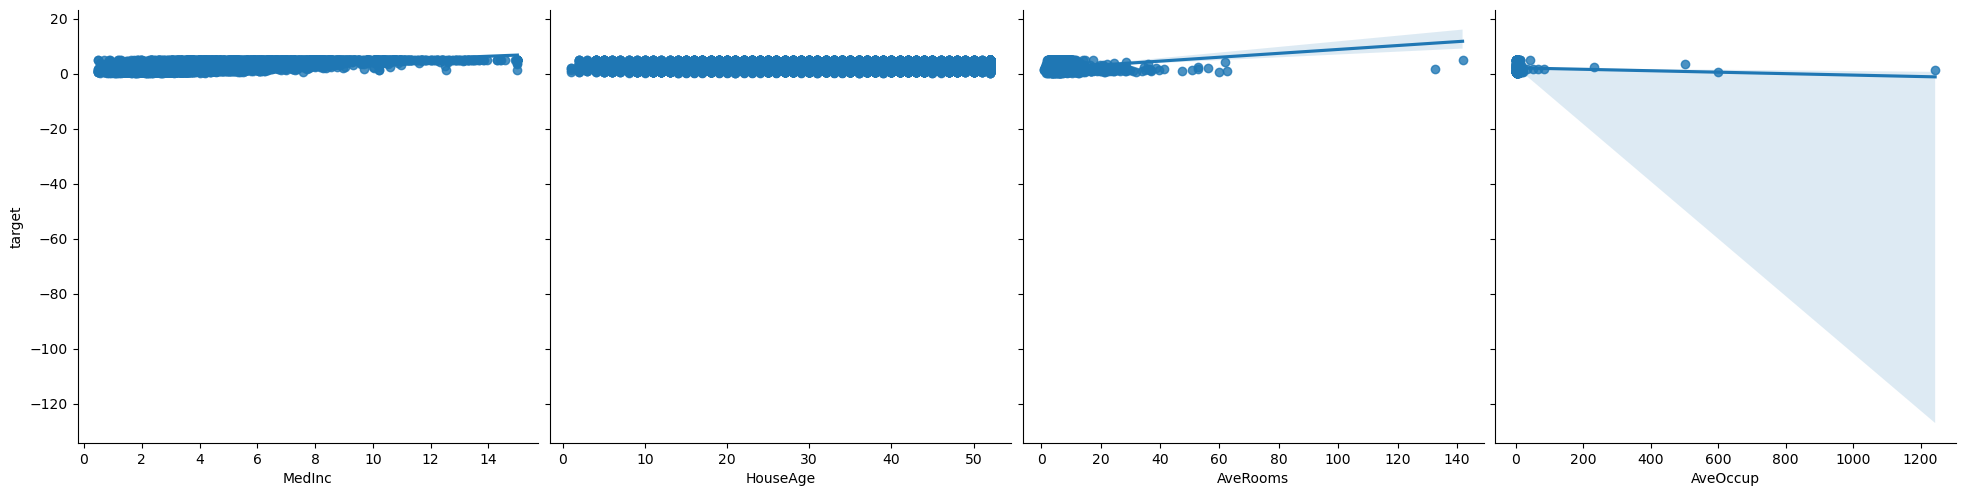

In [18]:
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms', 'AveOccup'], y_vars='target', height=5, aspect=1, kind='reg')
plt.show()

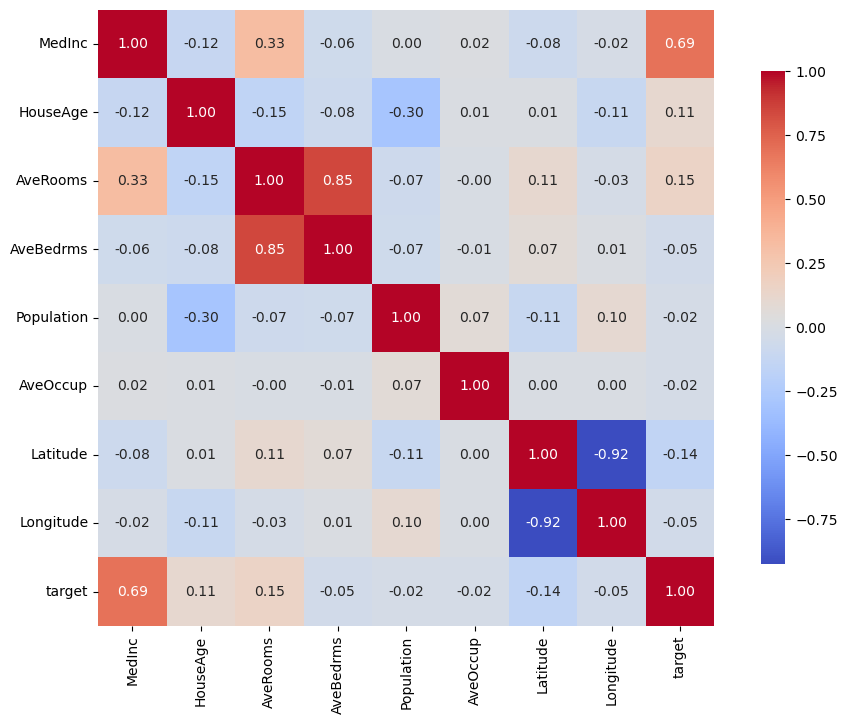

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})    
plt.show()


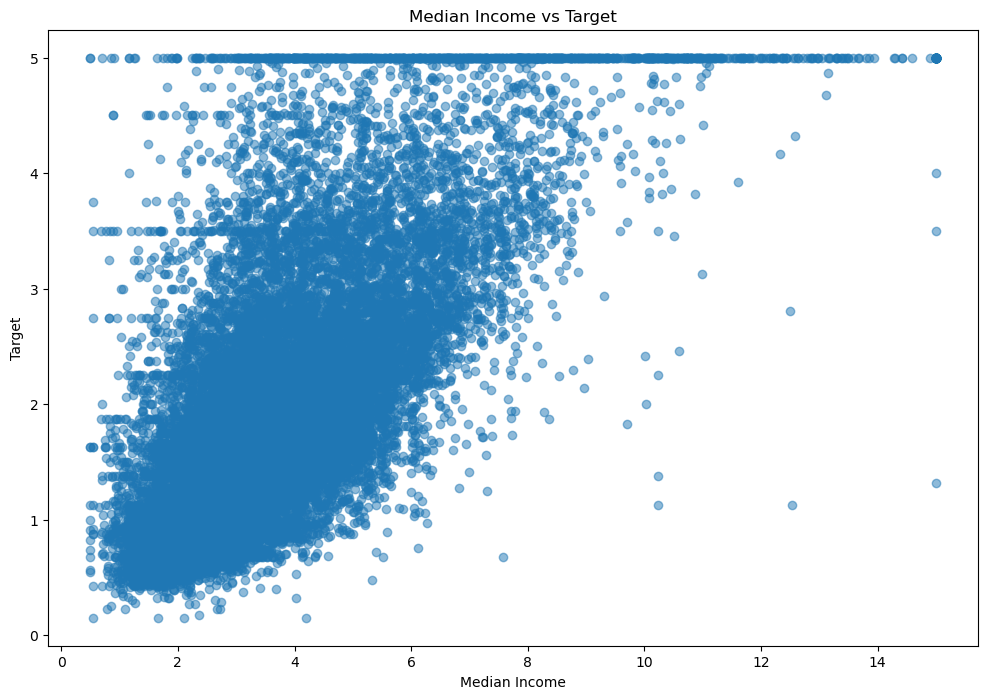

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(df['MedInc'], df['target'], alpha=0.5)
plt.title('Median Income vs Target')
plt.xlabel('Median Income')
plt.ylabel('Target')  
plt.show()

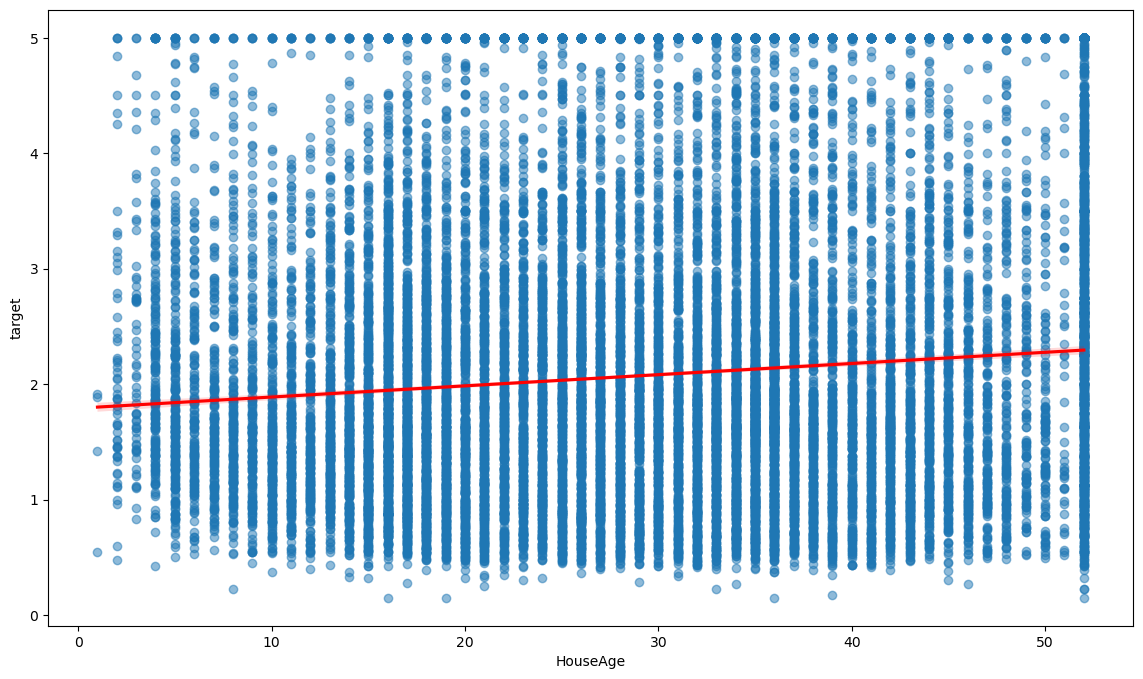

In [30]:
plt.figure(figsize=(14, 8))
sns.regplot(x='HouseAge', y='target', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

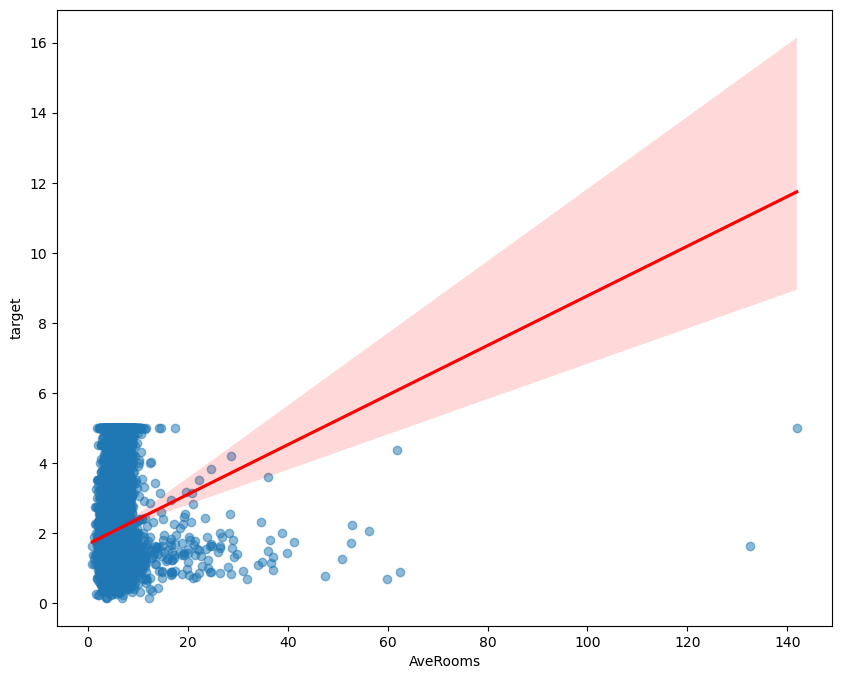

In [32]:
plt.figure(figsize=(10, 8))
sns.regplot(x='AveRooms', y='target', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

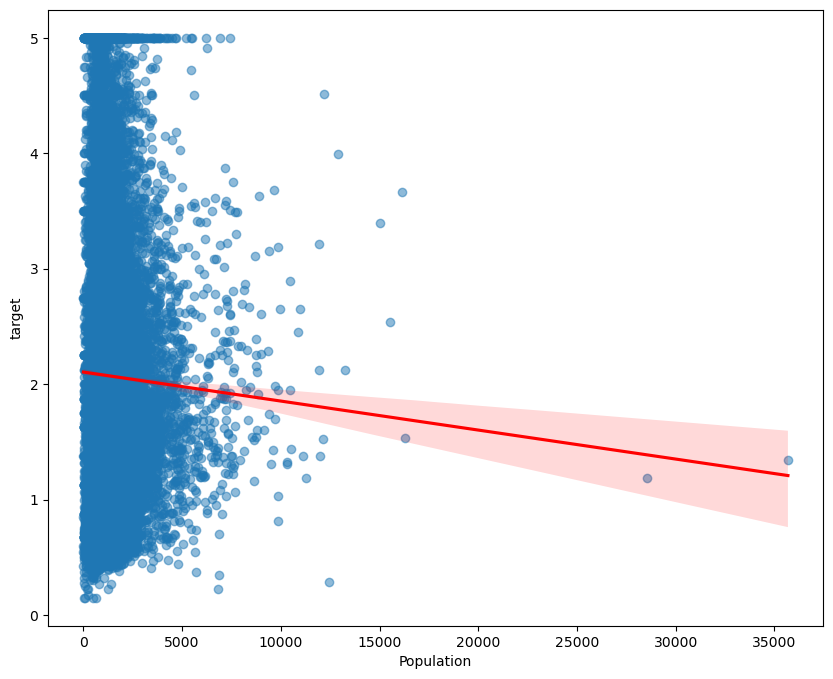

In [33]:
plt.figure(figsize=(10, 8))
sns.regplot(x='Population', y='target', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.show()

In [34]:
# independent and dependent features

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [35]:
x.shape, y.shape

((20640, 8), (20640,))

In [36]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets  

x_tain, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=17)    

In [37]:
x_tain.shape, x_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [38]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_tain)  
x_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

In [42]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [72]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('MAE:',mean_absolute_error(y_pred=y_pred, y_true= y_test))
print('MSE:',mean_squared_error(y_pred=y_pred, y_true= y_test))
print('R2:',r2_score(y_pred=y_pred, y_true= y_test))

MAE: 0.5317470739547064
MSE: 0.518502248006938
R2: 0.605058557540934


In [44]:
model.coef_

array([ 0.82342026,  0.1253592 , -0.25781643,  0.293606  ,  0.00233884,
       -0.04284236, -0.91381015, -0.88420586])

In [45]:
model.intercept_

np.float64(2.0728061254153154)

In [47]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

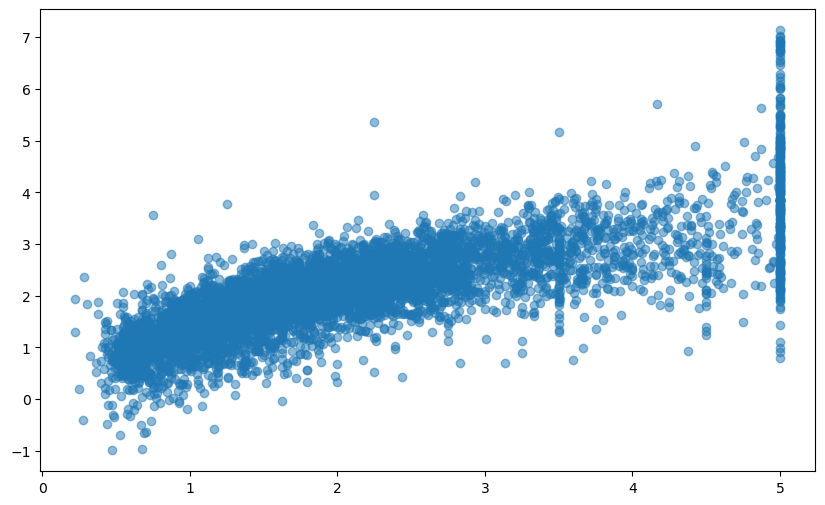

In [50]:
# plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.show()

In [52]:
residual = y_test - y_pred
residual

array([-0.51152526,  0.13226226, -0.70263207, ..., -0.08646875,
       -0.15897648, -0.08771325], shape=(6192,))

C:\Users\shahi\AppData\Local\Temp\ipykernel_5012\1981209940.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, bins=30, kde=True)


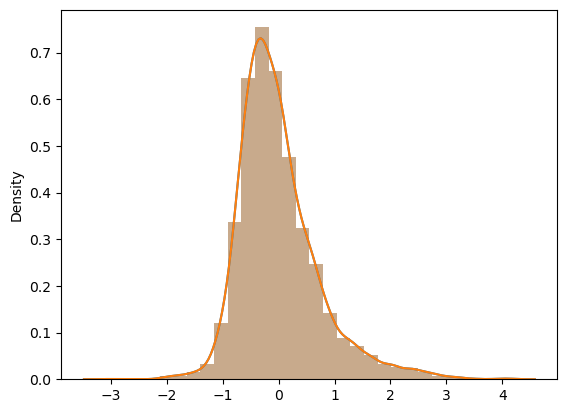

In [54]:
# plotting the residuals

sns.distplot(residual, bins=30, kde=True)
plt.show()

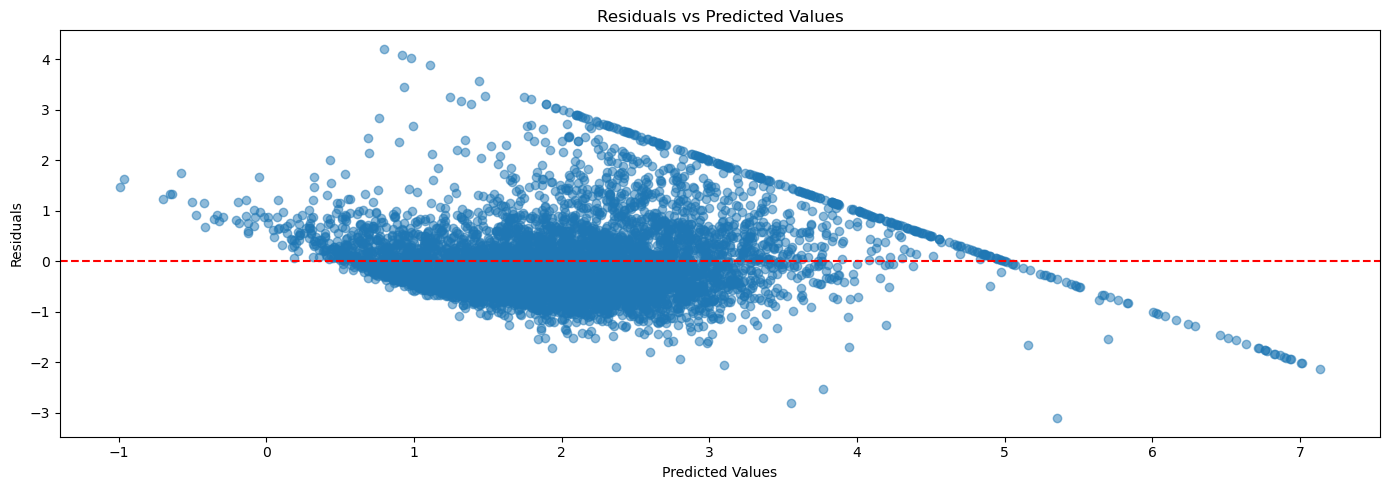

In [71]:
# scatter plot of predicted vs residual
plt.figure(figsize=(14, 5)) 
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [66]:
# New Data Predictions
data.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [67]:
scaler.transform(data.data[0].reshape(1,-1))

array([[ 2.33375852,  0.97772358,  0.59371529, -0.14673352, -0.98282877,
        -0.0464582 ,  1.04645369, -1.32422925]])

In [68]:
model.predict(scaler.transform(data.data[0].reshape(1,-1)))

array([4.1352084])

In [73]:
# pickling the model
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [75]:
m = pickle.load(open('linear_regression_model.pkl', 'rb'))

In [76]:
m.predict(scaler.transform(data.data[0].reshape(1,-1)))

array([4.1352084])